# **# Task # 1 - Prediction Using Supervised Machine Learning**
**Simple Linear Regression**

*This is the first task given under the internship programme of The Sparks Foundation.*


# **`Problem Statement:`**

# `In this task, we have to predict the percentage of marks that a student is expected to score, based upon the number of hours they study.`


# **IMPORTING REQUIRED LIBRARIES**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# **LOADING DATA**

In [34]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data Loading Successfull")

Data Loading Successfull


In [35]:
#Let's have a quick look at the data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [36]:
Hours = Hours = np.array([data.Hours]).reshape((-1,1))
Hours

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [37]:
Scores = np.array(data.Scores)
Scores

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [38]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# **DATA VISUALISATION**

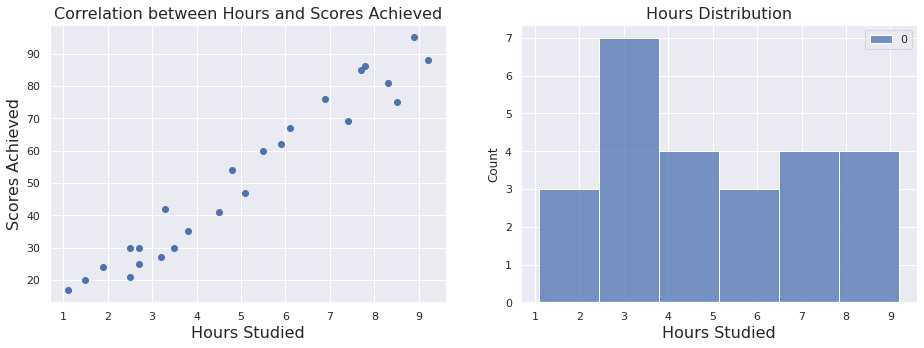

In [39]:
#Plotting the distribution of scores
plt.rcParams['figure.figsize'] = (13, 5)

plt.subplot(121)
plt.scatter(x = Hours, y = Scores)
plt.xlabel('Hours Studied', fontsize = 16)
plt.ylabel('Scores Achieved', fontsize = 16)
plt.title("Correlation between Hours and Scores Achieved", fontsize = 16)

plt.subplot(122)
sns.histplot(Hours)
plt.xlabel("Hours Studied", fontsize = 16)
plt.title("Hours Distribution", fontsize= 16)

plt.tight_layout()
plt.show()

The graph shows that there is a positive linear relation between the number of hours studied and percentage of score.

# **SPLITTING THE DATA**


*We have split the data into independant and dependant features(Hours, Scores). Then, we will divide them into training and test sets by using Scikit-Learn's built-in train_test_split() method with the ratio of 80:10.*

In [40]:
from sklearn.model_selection import train_test_split 
# split the features into training and test sets
x_train, x_test, y_train, y_test = train_test_split(Hours, Scores, test_size = 0.20, random_state = 42)

# **TRAINING THE ALGORITHM**

In [41]:
# initialize the model
model = LinearRegression()

# train the model on training set
model.fit(x_train, y_train)

print("Training complete.")

Training complete.


In [42]:
print("y intercept:",model.intercept_)
print("slope:",model.coef_)

y intercept: 2.826892353899737
slope: [9.68207815]


# **PLOTTING THE REGRESSION LINE**

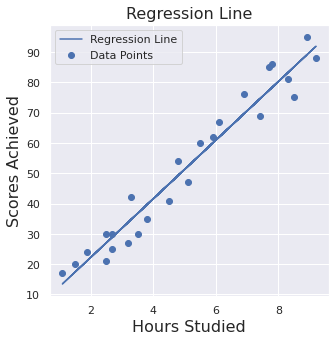

In [43]:
line = model.coef_ * Hours + model.intercept_
plt.rcParams['figure.figsize'] = (5,5)
plt.scatter(Hours, Scores, label = 'Data Points')
plt.plot(Hours, line, label = 'Regression Line')
plt.legend()
plt.xlabel("Hours Studied", fontsize = 16)
plt.ylabel("Scores Achieved", fontsize = 16)
plt.title("Regression Line", fontsize = 16)
plt.show()

# **EVALUATING THE MODEL**
*make predictions on the test set and evaluate our model.*

In [44]:
#make predictions on test set
prediction = model.predict(x_test)
print(x_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [45]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


*The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.*

In [46]:
from sklearn.metrics import mean_absolute_error

# calculatING the error
err = mean_absolute_error(y_test, prediction)
print("Mean Absolute Error: ", err)

Mean Absolute Error:  3.9207511902099244


# **MAKE PREDICTIONS**
*`What will be predicted score if a student studies for 9.25 hrs/ day?`*

In [47]:
hours = [[9.25]]

predict_score = model.predict(hours)
print("Hours:", hours[0][0])
print("Predicted Score:", predict_score[0])

Hours: 9.25
Predicted Score: 92.38611528261494
